## Image classification with Tensorflow


In [1]:
import os
import numpy as np
import io
import math
import time
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt


In [2]:
train_dir = os.path.join(os.getcwd(), 'splitdata/train')
validation_dir = os.path.join(os.getcwd(), 'splitdata/val')

In [3]:
# !wget -q https://raw.githubusercontent.com/aws-samples/amazon-sagemaker-script-mode/master/local_mode_setup.sh
# !wget -q https://raw.githubusercontent.com/aws-samples/amazon-sagemaker-script-mode/master/daemon.json    
# !/bin/bash ./local_mode_setup.sh

In [4]:
!pygmentize classification.py

import argparse
import numpy as np
import os
import tensorflow as tf
#from tensorflow.contrib.eager.python import 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers

#para prediccion
from tensorflow.keras import backend as K
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard



train_data_gen_args = dict(rescale=1./255,
                    shear_range=0.01,
                    rotation_range = 20,
                    zoom_range=0.2,
                    height_shift_range = 0.2,
                    width_shift_range = 0.2,
                    brightness_range=[0.1, 1.9],
                    horizontal_flip=Tr

In [5]:
import sagemaker
from sagemaker.tensorflow import TensorFlow


model_dir = '/opt/ml/model'
train_instance_type = 'local'
hyperparameters = {'epochs': 1}
local_estimator = TensorFlow(
                       entry_point='classification.py',
                       model_dir=model_dir,
                       train_instance_type=train_instance_type,
                       train_instance_count=1,
                       hyperparameters=hyperparameters,
                       role=sagemaker.get_execution_role(),
                       base_job_name='tf-keras-clasif',
                       framework_version='2.0.0',
                       py_version='py3',
                       script_mode=True)

In [6]:
inputs = {'train': f'file://{train_dir}','validation': f'file://{validation_dir}'}

local_estimator.fit(inputs)

'create_image_uri' will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


Creating tmpymq6x9i5_algo-1-e0apy_1 ... 
Attaching to tmpymq6x9i5_algo-1-e0apy_12mdone
algo-1-e0apy_1  | 2020-10-22 23:02:17,745 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
algo-1-e0apy_1  | 2020-10-22 23:02:17,751 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-e0apy_1  | 2020-10-22 23:02:18,892 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-e0apy_1  | 2020-10-22 23:02:18,908 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-e0apy_1  | 2020-10-22 23:02:18,926 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-e0apy_1  | 2020-10-22 23:02:18,937 sagemaker-containers INFO     Invoking user script
algo-1-e0apy_1  | 
algo-1-e0apy_1  | Training Env:
algo-1-e0apy_1  | 
algo-1-e0apy_1  | {
algo-1-e0apy_1  |     "additional_framework_parameters": {},
algo-1-e0apy_1  |     "channel_input_dirs": {
algo-1-e0apy_1  

In [7]:
s3_prefix = 'tf-caltech-sample4'

traindata_s3_prefix = '{}/data/train'.format(s3_prefix)
validation_s3_prefix = '{}/data/validation'.format(s3_prefix)


train_s3 = sagemaker.Session().upload_data(path='./splitdata/train/', key_prefix=traindata_s3_prefix)
validation_s3 = sagemaker.Session().upload_data(path='./splitdata/val/', key_prefix=validation_s3_prefix)

inputs = {'train':train_s3,'validation':validation_s3}
print(inputs)


{'train': 's3://sagemaker-us-west-2-963227052370/tf-caltech-sample4/data/train', 'validation': 's3://sagemaker-us-west-2-963227052370/tf-caltech-sample4/data/validation'}


In [8]:
train_instance_type = 'ml.p3.2xlarge'
hyperparameters = {'epochs': 30}

estimator = TensorFlow(
                       entry_point='classification.py',
                       model_dir=model_dir,
                       train_instance_type=train_instance_type,
                       train_instance_count=1,
                       hyperparameters=hyperparameters,
                       role=sagemaker.get_execution_role(),
                       base_job_name='tf-keras-clasif',
                       framework_version='2.0.0',
                       py_version='py3',
                       script_mode=True)


In [9]:
estimator.fit(inputs)

's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'create_image_uri' will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-10-22 23:05:16 Starting - Starting the training job...
2020-10-22 23:05:19 Starting - Launching requested ML instances......
2020-10-22 23:06:30 Starting - Preparing the instances for training......
2020-10-22 23:07:37 Downloading - Downloading input data...
2020-10-22 23:08:10 Training - Downloading the training image...
2020-10-22 23:08:37 Training - Training image download completed. Training in progress..2020-10-22 23:08:41,803 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
2020-10-22 23:08:42,208 sagemaker-containers INFO     Invoking user script

Training Env:

{
    "additional_framework_parameters": {},
    "channel_input_dirs": {
        "validation": "/opt/ml/input/data/validation",
        "train": "/opt/ml/input/data/train"
    },
    "current_host": "algo-1",
    "framework_module": "sagemaker_tensorflow_container.training:main",
    "hosts": [
        "algo-1"
    ],
    "hyperparameters": {
        "model_dir": "/opt/ml/mode

## Create the Estimator

I can use the estimator at any time

In [10]:
estimator

In [11]:
predictor = estimator.deploy(initial_instance_count=1, instance_type='ml.m5.xlarge')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.
'create_image_uri' will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


-----------!

## Model Evaluation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [13]:
train_data_gen_args = dict(rescale=1./255)

data_gen_args = dict(target_size=(224, 224),
        batch_size=16,
        shuffle=True,
        #color_mode='grayscale',
        class_mode='categorical')

In [14]:
train_datagen = ImageDataGenerator(**train_data_gen_args)

In [15]:
test_generator = train_datagen.flow_from_directory('splitdata/test/', **data_gen_args)

Found 22 images belonging to 4 classes.


In [16]:
number_of_examples = 22
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * data_gen_args['batch_size'])) 

test_labels = []
predictions = []
for i in range(0,int(number_of_generator_calls)):
    instances = test_generator[i][0]
    print(instances.shape)
    for instance in instances:
        array = instance.reshape((1,) + instance.shape)
        payload = {
          'instances': array.tolist()
        }
        resp = predictor.predict(payload)['predictions']
        predictions.append(np.array(resp))
        
    test_labels.extend(np.array(test_generator[i][1]))

(16, 224, 224, 3)
(6, 224, 224, 3)


In [17]:
np.array(predictions).shape

(22, 1, 4)

In [18]:
predictions = np.array(predictions).reshape(22,4)

In [19]:
np.argmax(predictions,axis=1)

array([0, 0, 0, 0, 1, 3, 2, 3, 2, 3, 1, 3, 0, 3, 1, 0, 2, 1, 1, 2, 1, 2])

In [20]:
predictions = np.argmax(predictions,axis=1)

In [21]:
labels = np.argmax(np.array(test_labels),axis=1)

In [22]:
accuracy_score(labels,predictions)

0.9545454545454546

In [23]:
test_generator.class_indices

{'078.fried-egg': 0,
 '120.joy-stick': 1,
 '130.license-plate': 2,
 '177.saturn': 3}

In [24]:
classes = list(test_generator.class_indices.keys())

In [25]:
classes

['078.fried-egg', '120.joy-stick', '130.license-plate', '177.saturn']

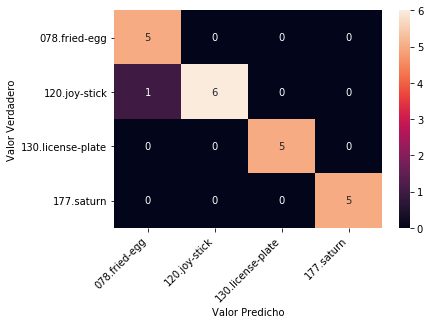

In [26]:
df_cm = confusion_matrix(labels,predictions,labels=np.unique(labels))

heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(classes, rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(classes, rotation=45, ha='right')
plt.ylabel('Valor Verdadero')
plt.xlabel('Valor Predicho');


## Boto3

(Real time predictor for Lambda)

In [27]:
import boto3
import json
client = boto3.client('sagemaker-runtime')

In [28]:
type(payload)

dict

In [31]:
endpoint_name = "tf-keras-clasif-2020-10-22-23-05-15-949"                                       # Your endpoint name.
content_type = "application/json"                                        # The MIME type of the input data in the request body.
json_payload = json.dumps(payload)

In [32]:
response = client.invoke_endpoint(
    EndpointName=endpoint_name, 
    ContentType=content_type,
    Body=json_payload
    )


In [33]:
eval(response['Body'].read())


{'predictions': [[9.11829375e-07,
   4.62847447e-06,
   0.999994397,
   3.75604881e-09]]}